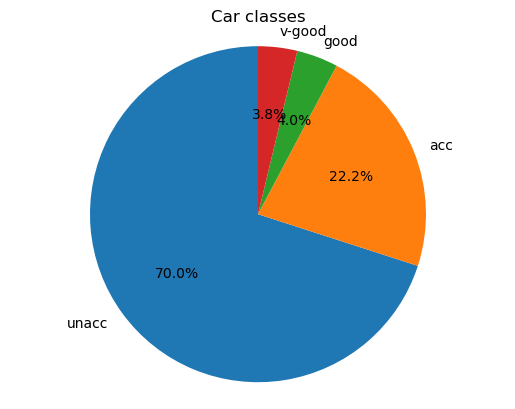

In [1]:
"""
buying:   vhigh, high, med, low.
maint:    vhigh, high, med, low.
doors:    2, 3, 4, 5more.
persons:  2, 4, more.
lug_boot: small, med, big.
safety:   low, med, high.
class:    unacc, acc, good, vgood
"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
data = pd.read_csv("carevaluation/car.data", header=None, names=columns, sep=",", skipinitialspace=True)

counts = {
    "unacc" : len(data[data["class"] == "unacc"]),
    "acc" : len(data[data["class"] == "acc"]),
    "good" : len(data[data["class"] == "good"]),
    "v-good" : len(data[data["class"] == "vgood"]),
}

labels = counts.keys()
sizes = counts.values()

plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Car classes")
plt.axis("equal")  

plt.show()



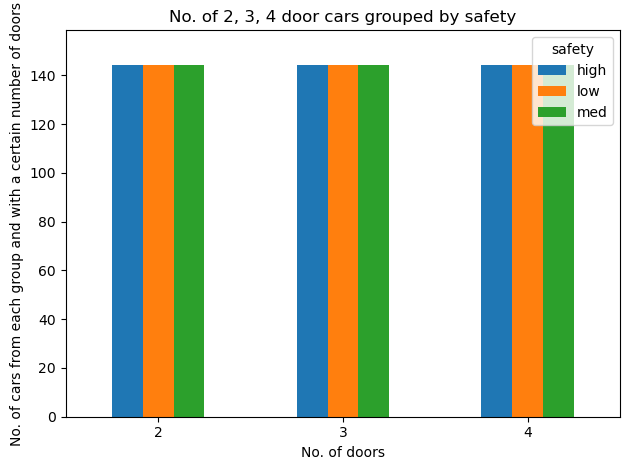

In [3]:
fdata = data[data["doors"].isin(["2", "3", "4"])]
counts = fdata.groupby(["doors", "safety"]).size().unstack(fill_value=0)
ax = counts.plot(kind="bar")
plt.title("No. of 2, 3, 4 door cars grouped by safety")
plt.xlabel("No. of doors")
plt.ylabel("No. of cars from each group and with a certain number of doors")
plt.xticks(rotation=0)
plt.tight_layout()
ax.set_ylim(0, counts. values.max() * 1.1)
plt.show()

<bound method DataFrame.iterrows of          buying     maint     doors   persons  lug_boot    safety
class                                                            
acc    2.424479  2.408854  3.585938  4.000000  2.101562  2.531250
good   1.333333  1.333333  3.565217  4.000000  2.043478  2.434783
unacc  2.649587  2.633058  3.454545  2.717149  1.932231  1.752893
vgood  1.400000  1.800000  3.769231  4.000000  2.615385  3.000000>


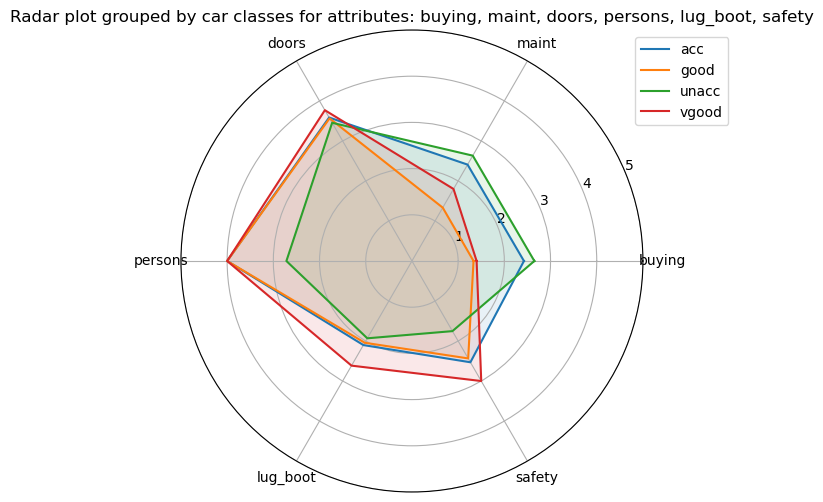

In [4]:
attributes = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
fdata = data[attributes].copy()
# Every attribute will be mapped to numbers, so I can group mean attributes for classes
mapping = {
    "buying": {"low": 1, "med": 2, "high": 3, "vhigh": 4},
    "maint":  {"low": 1, "med": 2, "high": 3, "vhigh": 4},
    "doors":  {"2": 2, "3": 3, "4": 4, "5more": 5},
    "safety": {"low": 1, "med": 2, "high": 3},
    "persons": {"2": 2, "3": 3, "more": 4},
    "lug_boot": {"small": 1, "med": 2, "big": 3}
}
for atr in mapping:
    fdata[atr] = fdata[atr].map(mapping[atr])
means = fdata.groupby(fdata["class"]).mean()
angles = np.linspace(0, 2*np.pi, 6, endpoint=False).tolist()
angles += angles[:1] # return to beggining to end the circle

_, ax = plt.subplots(figsize=(8,6), subplot_kw=dict(polar=True))
for class_id, row in means.iterrows():
    values = row.tolist()
    values += values[:1]  
    ax.plot(angles, values, label=class_id)
    ax.fill(angles, values, alpha=0.1)

print(means.iterrows)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(list(means.columns))
ax.set_title("Radar plot grouped by car classes for attributes: buying, maint, doors, persons, lug_boot, safety")
ax.set_ylim(0, 5)
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.0))
plt.show()


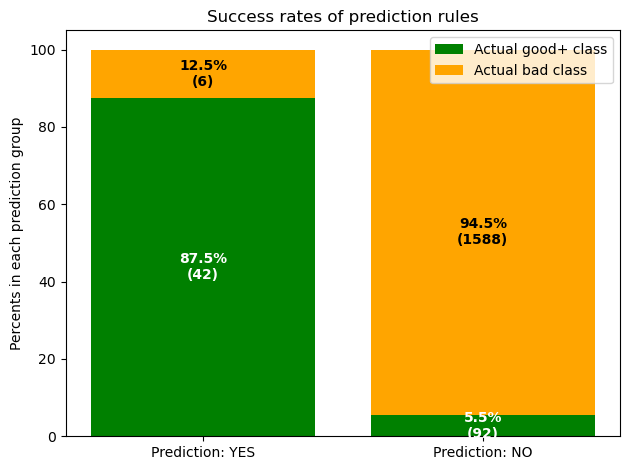

In [7]:
# Na wykresie z zadania 3 można zauważyć, że największy wpływ na wysoką klasę 
# auta ma: niski buying, niski maint, 
# do tego istotne jest persons = 4, wysokie safety 
attributes = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
fdata = data[attributes].copy()
mapping = {
    "buying": {"low": 1, "med": 2, "high": 3, "vhigh": 4},
    "maint":  {"low": 1, "med": 2, "high": 3, "vhigh": 4},
    "doors":  {"2": 2, "3": 3, "4": 4, "5more": 5},
    "safety": {"low": 1, "med": 2, "high": 3},
    "persons": {"2": 2, "3": 3, "more": 4},
    "lug_boot": {"small": 1, "med": 2, "big": 3}
}
for atr in mapping:
    fdata[atr] = fdata[atr].map(mapping[atr])

def predict(row):
    # reguła wymyślona na bazie wykresu z zadania 3
    return (
        row["buying"] <= 2 and
        row["maint"] <= 2 and
        row["persons"] == 4 and
        row["safety"] >= 2 and
        row["lug_boot"] >= 2 and 
        row["doors"] >= 3
    )
fdata["rule"] = fdata.apply(predict, axis=1)
fdata["good_class"] = fdata["class"].isin(["good", "vgood"]) # true if class == good or vgood

# There are 4 cases:
# 1. prediction said yes and it really was good
c1 = ((fdata["rule"] == True) &  (fdata["good_class"] == True) ).sum() 
# 2. prediction said yes but the class wasn't really good  
c2 = ((fdata["rule"] == True) &  (fdata["good_class"] == False)).sum()  
# 3. prediction said no but the class was actually good
c3 = ((fdata["rule"] == False) & (fdata["good_class"] == True) ).sum()  
# 4. prediction said no and it was really a bad class
c4 = ((fdata["rule"] == False) & (fdata["good_class"] == False)).sum()

n_yes = len(fdata[fdata["rule"] == True ])
n_no  = len(fdata[fdata["rule"] == False])

results = {
    "YES, Good+" : 100 * c1 / n_yes,
    "Yes, Bad"   : 100 * c2 / n_yes,
    "No,  Good+" : 100 * c3 / n_no ,
    "No,  Bad"   : 100 * c4 / n_no ,
}
categories = ["Prediction: YES", "Prediction: NO"]
plt.bar(categories, [results["YES, Good+"], results["No,  Good+"]], label="Actual good+ class", color="green" )
plt.bar(categories, [results["Yes, Bad"], results["No,  Bad"]], 
    bottom=[results["YES, Good+"], results["No,  Good+"]],
    label="Actual bad class", color="orange")    

for i, (g_pct, b_pct, g_count, b_count) in enumerate(zip(
    [results["YES, Good+"], results["No,  Good+"]],
    [results["Yes, Bad"], results["No,  Bad"]],
    [c1, c3],
    [c2, c4]
)):
    plt.text(i, g_pct / 2, f"{g_pct:.1f}%\n({g_count})", ha="center", va="center", color="white", fontweight="bold")
    plt.text(i, g_pct + b_pct / 2, f"{b_pct:.1f}%\n({b_count})", ha="center", va="center", color="black", fontweight="bold")

plt.ylabel("Percents in each prediction group")
plt.title("Success rates of prediction rules")
plt.legend()
plt.tight_layout()
plt.show()
